In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('churn.csv')

In [4]:
df.head(5)

,State,Account Length,Area Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?,Total_Calls,Total_Mins,Total_Charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91.0,11.01,10.0,3,2.70,1,False.,303.0,717.2,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103.0,11.45,13.7,3,3.70,1,False.,332.0,625.2,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104.0,7.32,12.2,5,3.29,0,False.,333.0,539.4,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89.0,8.86,6.6,7,1.78,2,False.,255.0,564.8,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121.0,8.41,10.1,3,2.73,3,False.,359.0,512.0,52.09


In [85]:
df.describe()

,Account Length,Area Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Total_Calls,Total_Mins,Total_Charge
count,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000
mean,101.033525,437.313802,8.092117,179.739414,100.438236,30.556243,200.872214,100.116581,17.126744,200.705165,100.090791,9.033534,10.241498,4.483842,2.765693,1.565690,305.129450,591.558291,59.482214
std,39.825508,42.448394,13.687281,54.459378,20.096212,9.258066,50.731640,19.905145,5.270011,50.538895,19.620253,2.273704,2.791169,2.463932,0.753655,1.314969,34.438113,89.906658,10.893570
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,8.610000,1.040000,0.000000,0.000000,0.000000,0.000000,191.000000,284.300000,22.930000
25%,74.000000,408.000000,0.000000,143.600000,87.000000,24.410000,166.400000,87.000000,14.140000,166.900000,87.000000,7.515000,8.500000,3.000000,2.300000,1.000000,282.000000,531.250000,52.350000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.200000,100.000000,17.100000,201.100000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,305.000000,593.200000,59.420000
75%,127.000000,510.000000,19.500000,216.200000,114.000000,36.750000,235.300000,114.000000,20.000000,235.050000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000,328.000000,652.150000,66.480000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,191.400000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,416.000000,885.000000,226.810000


In [86]:
df.isna()

,State,Account Length,Area Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?,Total_Calls,Total_Mins,Total_Charge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3311 non-null   object 
 1   Account Length  3311 non-null   int64  
 2   Area Code       3311 non-null   int64  
 3   Phone           3311 non-null   object 
 4   Intl_Plan       3311 non-null   object 
 5   Vmail_Plan      3311 non-null   object 
 6   Vmail_Message   3311 non-null   int64  
 7   Day_Mins        3311 non-null   float64
 8   Day_Calls       3311 non-null   int64  
 9   Day_Charge      3311 non-null   float64
 10  Eve_Mins        3311 non-null   float64
 11  Eve_Calls       3311 non-null   int64  
 12  Eve_Charge      3311 non-null   float64
 13  Night_Mins      3311 non-null   float64
 14  Night_Calls     3311 non-null   float64
 15  Night_Charge    3311 non-null   float64
 16  Intl_Mins       3311 non-null   float64
 17  Intl_Calls      3311 non-null   i

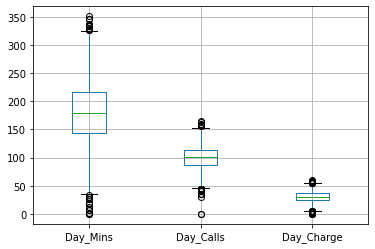

In [88]:
boxplot = df.boxplot(column =['Day_Mins','Day_Calls','Day_Charge'])

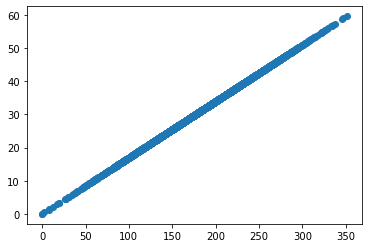

In [89]:
x = df['Day_Mins']
y = df['Day_Charge']

plt.scatter(x,y)
plt.show()

In [90]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  3311

Number of features: 24

Data Features:
['State', 'Account Length', 'Area Code', 'Phone', 'Intl_Plan', 'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn?', 'Total_Calls', 'Total_Mins', 'Total_Charge']

Unique values:
State               51
Account Length     212
Area Code            3
Phone             3311
Intl_Plan            2
Vmail_Plan           2
Vmail_Message       46
Day_Mins          1661
Day_Calls          119
Day_Charge        1661
Eve_Mins          1605
Eve_Calls          122
Eve_Charge        1436
Night_Mins        1586
Night_Calls        121
Night_Charge       933
Intl_Mins          162
Intl_Calls          21
Intl_Charge        162
CustServ_Calls      10
Churn?               2
Total_Calls        195
Total_Mins        2114
Total_Charge      2220
dtype: int64

In [91]:
df.isna().sum().sum()

0

False.    2830
True.      481
Name: Churn?, dtype: int64


D:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

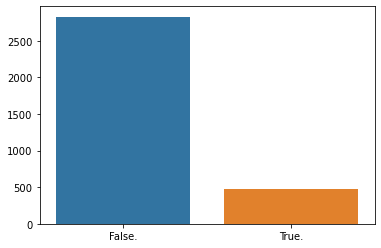

In [92]:
y = df["Churn?"].value_counts()
print (y)
sns.barplot(y.index, y.values)

In [93]:
numerical = list(set(df.columns)-set(['State', 'Intl Plan', 'VMail Plan',
                                     'Area code','Churn?', 'CustServ Calls']))
corr_matrix = df[numerical].corr()
corr_matrix

,Account Length,Day_Charge,Night_Calls,Intl_Calls,Night_Charge,Area Code,Total_Calls,Night_Mins,Eve_Mins,Day_Mins,Eve_Charge,Intl_Mins,Total_Charge,Total_Mins,Eve_Calls,CustServ_Calls,Day_Calls,Intl_Charge,Vmail_Message
Account Length,1.000000,0.005862,-0.011824,0.019422,-0.009148,-0.011378,0.028379,-0.008611,-0.007010,0.005864,-0.012727,0.008432,-0.002498,-0.004982,0.018172,-0.004256,0.039795,0.008478,-0.006753
Day_Charge,0.005862,1.000000,0.020237,0.009484,0.006275,-0.008457,0.024591,0.006889,0.005079,1.000000,-0.003639,-0.006777,0.848951,0.612261,0.014645,-0.013460,0.006714,-0.006696,-0.000276
Night_Calls,-0.011824,0.020237,1.000000,0.003087,0.013331,0.016392,0.560663,0.016874,0.006200,0.020238,-0.041289,-0.009553,-0.000645,0.024946,0.003565,-0.013600,-0.019439,-0.009428,0.007019
Intl_Calls,0.019422,0.009484,0.003087,1.000000,-0.012487,-0.024309,0.086131,-0.012054,0.004441,0.009485,-0.002355,0.029447,0.006357,0.002390,0.018044,-0.019231,0.004106,0.029530,0.013137
Night_Charge,-0.009148,0.006275,0.013331,-0.012487,1.000000,-0.004055,0.021487,0.999050,-0.014634,0.006274,-0.002941,-0.015249,0.211576,0.556662,0.000990,-0.009617,0.024355,-0.015242,0.009442
Area Code,-0.011378,-0.008457,0.016392,-0.024309,-0.004055,1.000000,-0.005705,-0.003637,0.005356,-0.008457,-0.000823,-0.019259,-0.009770,-0.004742,-0.013275,0.027334,-0.009651,-0.019344,-0.001112
Total_Calls,0.028379,0.024591,0.560663,0.086131,0.021487,-0.005705,1.000000,0.023178,-0.014684,0.024590,-0.034394,0.013564,0.009690,0.020059,0.584934,-0.018425,0.576345,0.013666,-0.003822
Night_Mins,-0.008611,0.006889,0.016874,-0.012054,0.999050,-0.003637,0.023178,1.000000,-0.014768,0.006888,-0.027970,-0.013547,0.199914,0.557545,0.000424,-0.009876,0.024303,-0.013459,0.009905
Eve_Mins,-0.007010,0.005079,0.006200,0.004441,-0.014634,0.005356,-0.014684,-0.014768,1.000000,0.005072,0.820194,-0.009260,0.397406,0.558754,-0.012366,-0.014264,-0.019512,-0.009307,0.018866
Day_Mins,0.005864,1.000000,0.020238,0.009485,0.006274,-0.008457,0.024590,0.006888,0.005072,1.000000,-0.003647,-0.006775,0.848947,0.612256,0.014644,-0.013456,0.006712,-0.006694,-0.000273


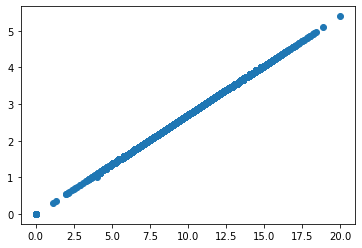

In [94]:
x = df['Intl_Mins']
y = df['Intl_Charge']

plt.scatter(x,y)
plt.show()

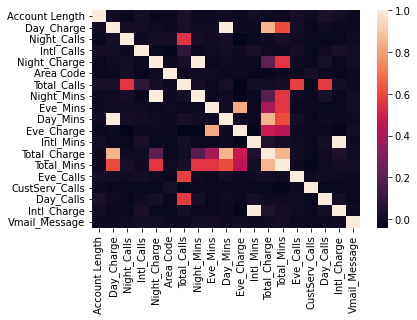

In [95]:
sns.heatmap(corr_matrix);

D:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


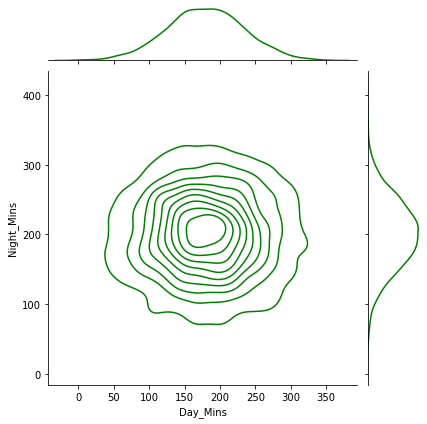

In [96]:
sns.jointplot('Day_Mins', 'Night_Mins', data = df, kind = 'kde', color='g');

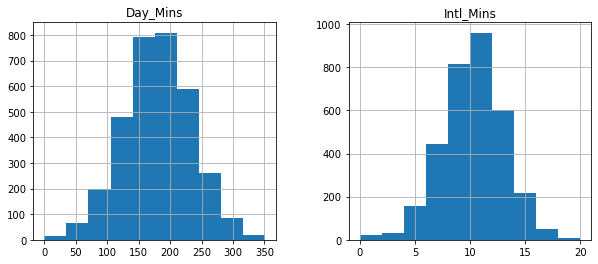

In [115]:
features = ['Day_Mins','Intl_Mins']
df[features].hist(figsize=(10,4));

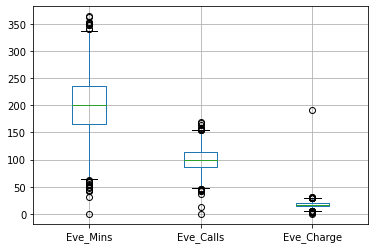

In [98]:
boxplot1 = df.boxplot(column =['Eve_Mins','Eve_Calls','Eve_Charge'])

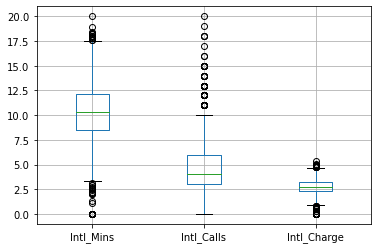

In [99]:
boxplot2 = df.boxplot(column =['Intl_Mins','Intl_Calls','Intl_Charge'])

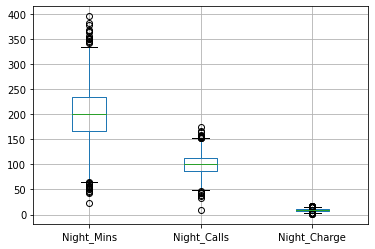

In [100]:
boxplot3 = df.boxplot(column =['Night_Mins','Night_Calls','Night_Charge'])

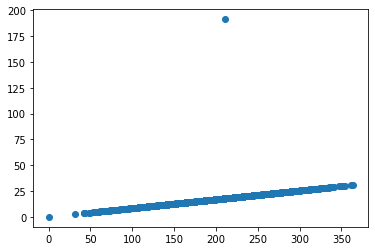

In [101]:
x = df['Eve_Mins']
y = df['Eve_Charge']

plt.scatter(x,y)
plt.show()

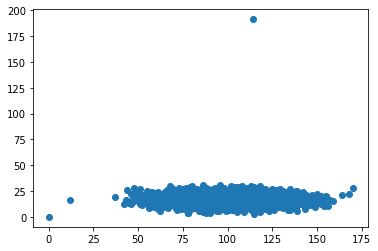

In [102]:
x = df['Eve_Calls']
y = df['Eve_Charge']

plt.scatter(x,y)
plt.show()

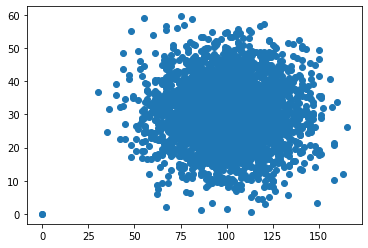

In [103]:
x = df['Day_Calls']
y = df['Day_Charge']

plt.scatter(x,y)
plt.show()

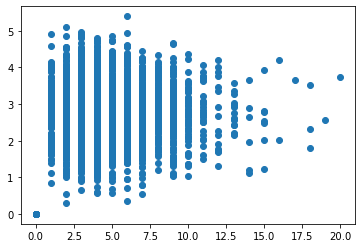

In [104]:
x = df['Intl_Calls']
y = df['Intl_Charge']

plt.scatter(x,y)
plt.show()

1    1176
2     756
0     687
3     427
4     164
5      66
6      22
7       9
9       2
8       2
Name: CustServ_Calls, dtype: int64


D:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

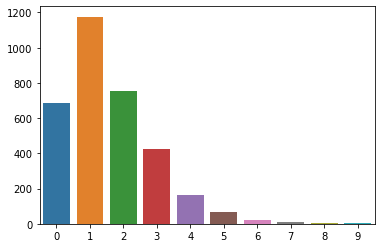

In [105]:
y = df["CustServ_Calls"].value_counts()
print (y)
sns.barplot(y.index, y.values)

In [106]:
sns.countplot(x='Churn?',data=df, hue='InternetService')

ValueError: Could not interpret input 'InternetService'

D:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


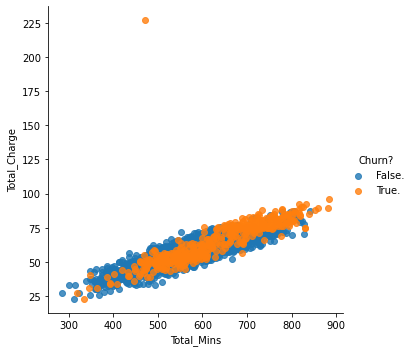

In [107]:
sns.lmplot('Total_Mins', 'Total_Charge', data = df, hue='Churn?', fit_reg=False)

AttributeError: 'Figure' object has no attribute 'bar'

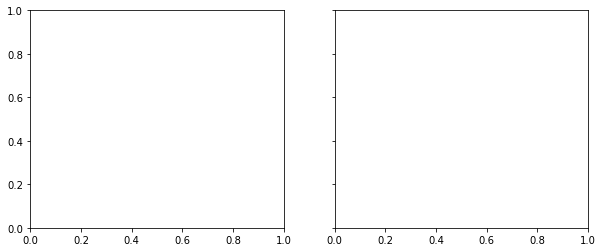

In [119]:
axes = plt.subplots(1, 2, sharey = True, figsize=(10,4))

sns.countplot(x = 'Intl_Plan', hue = 'Churn?', data = df, ax = axes[0]);
sns.countplot(x = 'Vmail_Plan', hue = 'Churn?', data = df, ax = axes[1])

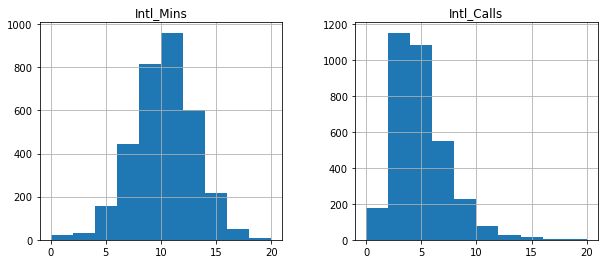

In [72]:
features = ['Intl_Mins','Intl_Calls']
df[features].hist(figsize=(10,4));

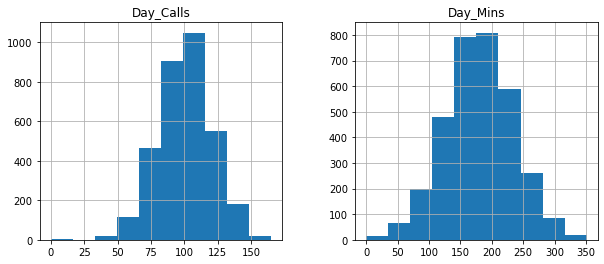

In [117]:
features = ['Day_Calls','Day_Mins']
df[features].hist(figsize=(10,4));

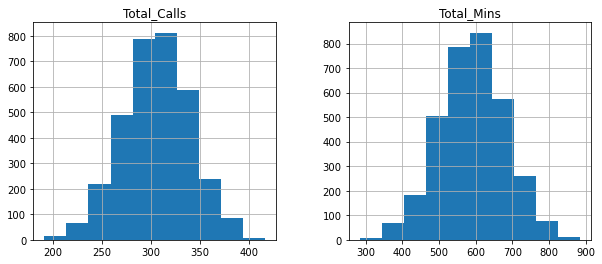

In [118]:
features = ['Total_Calls','Total_Mins']
df[features].hist(figsize=(10,4));

In [6]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

NameError: name 'y' is not defined

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'X' is not defined

In [13]:
churn_result = df['Churn?']

In [14]:
churn_result = df['Churn?']
y = np.where(churn_result == 'True.',1,0)

In [16]:
to_drop = ['State','Area Code','Phone','Churn?']
churn_feat_space = df.drop(to_drop,axis=1)

In [20]:
yes_no_cols = ["Intl_Plan","Vmail_Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

In [21]:
features = churn_feat_space.columns
print (features)

Index(['Account Length', 'Intl_Plan', 'Vmail_Plan', 'Vmail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Total_Calls',
       'Total_Mins', 'Total_Charge'],
      dtype='object')


In [22]:
X = churn_feat_space.as_matrix().astype(np.float)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [67]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline

X = churn_feat_space.astype(np.float)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))



Feature space holds 3311 observations and 20 features
Unique target labels: [0 1]


C:\Users\admin\AppData\Local\Temp/ipykernel_13700/3268744342.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.astype(np.float)


In [30]:
X = churn_feat_space.astype(np.float)

C:\Users\admin\AppData\Local\Temp/ipykernel_13700/3296995391.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.astype(np.float)


In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3311 observations and 20 features
Unique target labels: [0 1]


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2648, 20) (2648,)
(663, 20) (663,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2648, 20) (2648,)
(663, 20) (663,)


In [43]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF()
rf_model = rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
print(predictions_rf[0:5])
print(rf_model.score(X_test, y_test))

[0 0 0 1 0]
0.9728506787330317


In [69]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C = 1, penalty = 'l2', solver = 'newton-cg')

lr = model.fit(X_train, y_train)
prediction = lr.predict(X_test)

print('Classification report : ', metrics.classification_report(y_test, prediction))
print('Confusion Matrix : ', metrics.confusion_matrix(y_test, prediction))

F1_score = metrics.f1_score(y_test, prediction, average = 'weighted')
print('Accuracy of the model on testing sample data : ', round(F1_score, 2))

Acc_Value = cross_val_score(lr, X, y, cv = 10, scoring='f1_weighted')
print('Accuracy values for 10-fold cross validation : ',Acc_Value)
print('Final average accuracy of the model : ', round(Acc_Value.mean(), 2))



Classification report :                precision    recall  f1-score   support

           0       0.87      0.98      0.93       566
           1       0.63      0.18      0.27        97

    accuracy                           0.86       663
   macro avg       0.75      0.58      0.60       663
weighted avg       0.84      0.86      0.83       663

Confusion Matrix :  [[556  10]
 [ 80  17]]
Accuracy of the model on testing sample data :  0.83
Accuracy values for 10-fold cross validation :  [0.8190099  0.85471798 0.84530147 0.82140282 0.81717447 0.83660427
 0.83964522 0.82567662 0.84020357 0.84530147]
Final average accuracy of the model :  0.83


In [61]:
print("class : ", lr.classes_)
print("Intercept : ", lr.intercept_)
print('Coefficients : ', lr.coef_)

print('Probability of prediction : ', lr.predict_prob(X))
print('Prediction : 'lr.predict(X))

SyntaxError: invalid syntax (Temp/ipykernel_13700/1061893272.py, line 6)

In [63]:
print('Classification report : ', metrics.classification_report(y_test, prediction))
print('Confusion Matrix : ', metrics.confusion_matrix(y_test, prediction))

F1_score = metrics.f1_score(y_test, prediction, average = 'weighted')
print('Accuracy of the model on testing sample data : ', round(F1_score, 2))

Acc_Value = cross_val_score(lr, X, y, cv = 10, scoring='f1_weighted')
print('Accuracy values for 10-fold cross validation : ',Acc_Value)
print('Final average accuracy of the model : ', round(Acc_Value.mean(), 2))

Classification report :                precision    recall  f1-score   support

           0       0.85      0.97      0.91       544
           1       0.64      0.21      0.32       119

    accuracy                           0.84       663
   macro avg       0.75      0.59      0.61       663
weighted avg       0.81      0.84      0.80       663

Confusion Matrix :  [[530  14]
 [ 94  25]]
Accuracy of the model on testing sample data :  0.8
Accuracy values for 10-fold cross validation :  [0.8190099  0.85471798 0.84530147 0.82140282 0.81717447 0.83660427
 0.83964522 0.82567662 0.84020357 0.84530147]
Final average accuracy of the model :  0.83


In [66]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model2 = KNeighborsClassifier(n_neighbors=3)

knn = model.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("classification Report : ", metrics.classification_report (y_test, prediction))
print('confusion Matrix : \n', metrics.confusion_matrix(y_test, prediction))

F1_score = metrics.f1_score(y_test, prediction, average = 'weighted')
print('Accuracy of the model on testing sample data : ', round(F1_score, 2))

Acc_Value = cross_val_score(lr, X, y, cv = 10, scoring='f1_weighted')
print('Accuracy values for 10-fold cross validation : ',Acc_Value)
print('Final average accuracy of the model : ', round(Acc_Value.mean(), 2))

classification Report :                precision    recall  f1-score   support

           0       0.85      0.97      0.91       544
           1       0.64      0.21      0.32       119

    accuracy                           0.84       663
   macro avg       0.75      0.59      0.61       663
weighted avg       0.81      0.84      0.80       663

confusion Matrix : 
 [[530  14]
 [ 94  25]]
Accuracy of the model on testing sample data :  0.8
Accuracy values for 10-fold cross validation :  [0.8190099  0.85471798 0.84530147 0.82140282 0.81717447 0.83660427
 0.83964522 0.82567662 0.84020357 0.84530147]
Final average accuracy of the model :  0.83


In [76]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_rf = cross_val_score(rf_model, X, y, cv=6)
print('Random Forest scores:', scores_rf)

print(scores_rf.mean())

cross_val_predict_lr = cross_val_predict(rf_model, X, y, cv=6)
print('Random Forest predictions', cross_val_predict_lr)

Random Forest scores: [0.97463768 0.97101449 0.97282609 0.98731884 0.97282609 0.98548094]
0.9773506886907423
Random Forest predictions [0 0 0 ... 0 0 0]
